# Credit Risk Resampling Techniques

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

# Read the CSV into DataFrame

In [78]:
# Load the data
file_path = Path('Resources/lending_data.csv')
df = pd.read_csv(file_path)
df.head()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,own,52800,0.431818,5,1,22800,low_risk
1,8400.0,6.692,own,43600,0.311927,3,0,13600,low_risk
2,9000.0,6.963,rent,46100,0.349241,3,0,16100,low_risk
3,10700.0,7.664,own,52700,0.430740,5,1,22700,low_risk
4,10800.0,7.698,mortgage,53000,0.433962,5,1,23000,low_risk


# Split the Data into Training and Testing

In [79]:
# Create our features
X = df.drop(columns=['loan_status', 'homeowner']) # drop the loan_status and homeowner columns from the dataframe of features 
# loan status is going to be the target data to predict, so we will drop it from the features 
# Create our target
y = df.loan_status.to_frame()

In [80]:
X.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000


In [81]:
y.describe()

,loan_status
count,77536
unique,2
top,low_risk
freq,75036


In [82]:
# Check the balance of our target values
y['loan_status'].value_counts()

low_risk     75036
high_risk     2500
Name: loan_status, dtype: int64

In [83]:
# Create X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [84]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()

In [85]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
data_scaler.fit(X_train, X_test)

StandardScaler()

In [86]:
X_train.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,58152.000000,58152.000000,58152.000000,58152.000000,58152.000000,58152.000000,58152.000000
mean,9807.982529,7.293376,49231.752992,0.377465,3.827985,0.392076,19231.752992
std,2093.250476,0.889482,8371.427552,0.081385,1.903875,0.582672,8371.427552
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.828000,44900.000000,0.331849,3.000000,0.000000,14900.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000
75%,10400.000000,7.527000,51400.000000,0.416342,4.000000,1.000000,21400.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000


In [87]:
# Scale the training and testing data
X_train = data_scaler.transform(X_train)
X_train[:5]

array([[-0.57708952, -0.56367666, -0.5652314 , -0.63429794, -0.43489843,
        -0.67289855, -0.5652314 ],
       [-0.95927354, -0.98302549, -0.98332378, -1.34143791, -0.96014741,
        -0.67289855, -0.98332378],
       [ 0.09173251,  0.10413354,  0.10371642,  0.29161787,  0.09035056,
         1.04334691,  0.10371642],
       [-0.24267851, -0.22527452, -0.23075749, -0.14393449, -0.43489843,
        -0.67289855, -0.23075749],
       [-0.29045151, -0.27923898, -0.27853948, -0.21040167, -0.43489843,
        -0.67289855, -0.27853948]])

# Simple Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [89]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5

In [90]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[    0,   619],
       [    0, 18765]])

In [91]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.00      0.00      1.00      0.00      0.00      0.00       619
   low_risk       0.97      1.00      0.00      0.98      0.00      0.00     18765

avg / total       0.94      0.97      0.03      0.95      0.00      0.00     19384



# Oversampling

In this section, you will compare two oversampling algorithms to determine which algorithm results in the best performance. You will oversample the data using the naive random oversampling algorithm and the SMOTE algorithm. For each algorithm, be sure to complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

### Naive Random Oversampling

In [92]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# View the count of target classes with Counter
Counter(y_resampled)
y_resampled.shape

(112542, 1)

In [93]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_resampled)

In [94]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_resampled, y_pred)

0.9947130848927511

<AxesSubplot:>

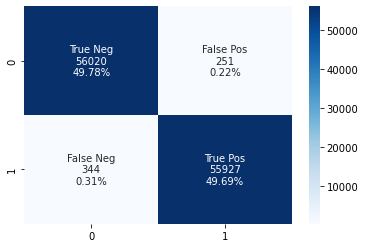

In [95]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_resampled, y_pred)

# Boilerplate confusion matrix heatmap
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [96]:
# Print the imbalanced classification report

print(classification_report_imbalanced(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [19384, 112542]

### SMOTE Oversampling

In [ ]:
# Resample the training data with SMOTE


# View the count of target classes with Counter


In [ ]:
# Train the Logistic Regression model using the resampled data


In [ ]:
# Calculated the balanced accuracy score


In [ ]:
# Display the confusion matrix


In [ ]:
# Print the imbalanced classification report


# Undersampling

In this section, you will test an undersampling algorithm to determine which algorithm results in the best performance compared to the oversampling algorithms above. You will undersample the data using the Cluster Centroids algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [ ]:
# Resample the data using the ClusterCentroids resampler


# View the count of target classes with Counter


In [ ]:
# Train the Logistic Regression model using the resampled data


In [ ]:
# Calculate the balanced accuracy score


In [ ]:
# Display the confusion matrix


In [ ]:
# Print the imbalanced classification report


# Combination (Over and Under) Sampling

In this section, you will test a combination over- and under-sampling algorithm to determine if the algorithm results in the best performance compared to the other sampling algorithms above. You will resample the data using the SMOTEENN algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [ ]:
# Resample the training data with SMOTEENN


# View the count of target classes with Counter
# YOUR CODE HERE

In [ ]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE

In [ ]:
# Calculate the balanced accuracy score
# YOUR CODE HERE

In [ ]:
# Display the confusion matrix
# YOUR CODE HERE

In [ ]:
# Print the imbalanced classification report
# YOUR CODE HERE

# Final Questions

1. Which model had the best balanced accuracy score?

   YOUR ANSWER HERE.

2. Which model had the best recall score?

    YOUR ANSWER HERE.

3. Which model had the best geometric mean score?

    YOUR ANSWER HERE.
